In [1]:
from algorithm_ranking import MeasurementsSimulator, MeasurementsVisualizer, RankVariantsSort2, RankVariantsDFGTr

In [2]:
import pandas as pd
import numpy as np

In [3]:
cfg = {}
cfg['t0']  = [0.2,0.01] #[mean, std]
cfg['t1']  = [0.216,0.01]
cfg['t2']  = [0.198,0.01]
cfg['t3']  = [0.209,0.003]
h0 = list(cfg.keys())

In [4]:
ms = MeasurementsSimulator(cfg, 'normal',seed=159) 
ms.measure(10,1)

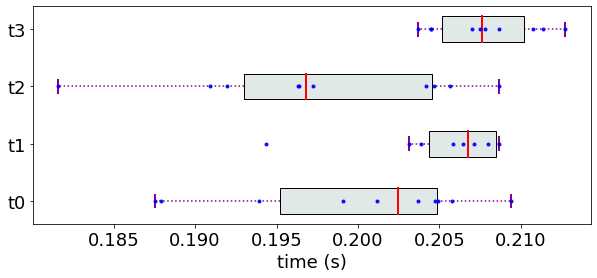

In [5]:
mv = MeasurementsVisualizer(ms.get_alg_measurements(), h0)
fig = mv.show_measurements_boxplots(tick_size=18,scale=1.0)

In [6]:
rv = RankVariantsDFGTr(ms.get_alg_measurements(), h0)

In [7]:
q_maxs=[ 75, 70, 65,60]
q_mins=[25, 30, 35,40]
df_r, qlims, avg_rels, rels = rv.rank_variants_reliable(q_maxs=q_maxs, q_mins=q_mins)

In [8]:
df_r

,case:concept:name,case:rank:q75-q25,case:rank:q70-q30,case:rank:q65-q35,case:rank:q60-q40,case:mean-rank
0,t0,0,0,0,1,0.25
1,t1,0,1,1,2,1.00
2,t2,0,0,0,0,0.00
3,t3,1,1,1,2,1.25


In [9]:
avg_rels

{'case:rank:q75-q25': -0.375,
 'case:rank:q70-q30': -0.125,
 'case:rank:q65-q35': -0.125,
 'case:rank:q60-q40': -0.625}

In [10]:
rels

,case:rank:q75-q25,case:rank:q70-q30,case:rank:q65-q35,case:rank:q60-q40
0,-0.25,-0.25,-0.25,-0.75
1,-1.00,-0.00,-0.00,-1.00
2,-0.00,-0.00,-0.00,-0.00
3,-0.25,-0.25,-0.25,-0.75


In [11]:
df_r[qlims]

,case:rank:q70-q30,case:rank:q65-q35
0,0,0
1,1,1
2,0,0
3,1,1


In [18]:
rv.rank_variants(debug=True)

comparing t0 and t1
comparing t1 and t2
comparing t2 and t3
Adding edge from t2 to t3
comparing t0 and t2
comparing t1 and t3
comparing t0 and t3
Adding edge from t0 to t3


,case:concept:name,case:rank:q75-q25
0,t0,0
1,t1,0
2,t2,0
3,t3,1


In [29]:
import math

q_maxs=[80, 75, 70, 65, 60]
q_mins=[20, 25, 30, 35, 40]

def rank_variants_reliable(rv, q_maxs, q_mins):
    r, mr = rv.calculate_mean_rank(q_maxs=q_maxs, q_mins = q_mins)
    
    r_mr = pd.merge(r, mr, on=['case:concept:name'])
    rels = {}
    avg_rels = {}
    for col in r_mr:
        if 'rank:' in col:
            rels[col] = -(r_mr[col] - r_mr['case:mean-rank']).abs()
            avg_rels[col] = rels[col].mean()
    
    minval = max(avg_rels.values())
    qlims = [k for k, v in avg_rels.items() if v==minval]
    
    return r_mr,qlims,avg_rels, pd.DataFrame.from_dict(rels)

In [30]:
df_r, qlims, avg_rels, rels = rank_variants_reliable(rv,q_maxs,q_mins)

In [31]:
df_r

,case:concept:name,case:rank:q80-q20,case:rank:q75-q25,case:rank:q70-q30,case:rank:q65-q35,case:rank:q60-q40,case:mean-rank
0,t0,0,0,0,0,1,0.2
1,t1,0,0,1,1,2,0.8
2,t2,0,0,0,0,0,0.0
3,t3,0,1,1,1,2,1.0


In [32]:
df_r[qlims]

,case:rank:q70-q30,case:rank:q65-q35
0,0,0
1,1,1
2,0,0
3,1,1


In [33]:
avg_rels

{'case:rank:q80-q20': -0.5,
 'case:rank:q75-q25': -0.25,
 'case:rank:q70-q30': -0.09999999999999999,
 'case:rank:q65-q35': -0.09999999999999999,
 'case:rank:q60-q40': -0.75}

In [34]:
rels

,case:rank:q80-q20,case:rank:q75-q25,case:rank:q70-q30,case:rank:q65-q35,case:rank:q60-q40
0,-0.2,-0.2,-0.2,-0.2,-0.8
1,-0.8,-0.8,-0.2,-0.2,-1.2
2,-0.0,-0.0,-0.0,-0.0,-0.0
3,-1.0,-0.0,-0.0,-0.0,-1.0


### Rough

In [15]:
tmp = pd.merge(df_r, df_mr, on=['case:concept:name'])
tmp

,case:concept:name,case:rank:q80-q20,case:rank:q75-q25,case:rank:q70-q30,case:rank:q65-q35,case:rank:q60-q40,case:mean-rank
0,t0,0,0,0,0,1,0.2
1,t1,0,0,1,1,2,0.8
2,t2,0,0,0,0,0,0.0
3,t3,0,1,1,1,2,1.0


In [32]:
rels = {}
avg_rels = {}
for col in tmp:
    if 'rank:' in col:
        key = col.split(':')[-1]
        rels[key] = -(tmp[col] - tmp['case:mean-rank']).abs()
        avg_rels[key] = rels[key].mean()

In [43]:
minval = max(avg_rels.values())
res = [k for k, v in avg_rels.items() if v==minval]

In [44]:
res

['q70-q30', 'q65-q35']

In [42]:
avg_rels

{'q80-q20': -0.5,
 'q75-q25': -0.25,
 'q70-q30': -0.09999999999999999,
 'q65-q35': -0.09999999999999999,
 'q60-q40': -0.75}

In [47]:
max(avg_rels.values())

-0.09999999999999999